In [51]:
import numpy as np
import pandas as pd
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import cv2
import os
import glob

In [52]:
data = []
labels = []
img_dir = Path('C:/Users/hrishikesh/Desktop/gender_dataset_face')
filepaths = list(img_dir.glob(r'**/*.jpg'))
image_files = [os.path.abspath(filepaths[0]) for filepaths[0] in filepaths ]
random.shuffle(image_files)
image_files

['C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\132402.jpg.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\face_465.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\man\\face_281.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\man\\face_56.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\face_812.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\132575.jpg.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\131506.jpg.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\man\\face_564.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\113186.jpg.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\man\\face_1515.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\man\\face_1205.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\132378.jpg.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\woman\\face_510.jpg'

In [53]:
#how to get labels...
'C:\\Users\\hrishikesh\\Desktop\\gender_dataset_face\\man\\face_175.jpg'.split(os.path.sep)[-2]

'man'

In [54]:
# we will resize the image and convert images to arrays
for img in image_files:
    image = cv2.imread(img)
    image = cv2.resize(image, (112,112))
    image = img_to_array(image)
    data.append(image)
    label = img.split(os.path.sep)[-2] 
    if label == "man":
        label = 0
    else:
        label = 1
    labels.append([label])

In [55]:
#we will normalize the data
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [57]:
#split the data
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [58]:
# one hot encoding the classes
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [59]:
#data augmentaion
data_augmentation = ImageDataGenerator(rotation_range=25,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2, zoom_range=0.2,
                      horizontal_flip=True)
training = data_augmentation.flow(X_train, y_train, batch_size=64)

In [60]:
# model building
model = Sequential()
model.add(Conv2D(32,3, padding="same", input_shape=(112,112, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3))
model.add(Dropout(0.25))

model.add(Conv2D(64,3, padding="same",activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64,3, padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Conv2D(128,3, padding="same",activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128,3, padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(650,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

In [61]:
#compiling the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [62]:
#model fitting
history = model.fit(training,
              validation_data=(X_test,y_test),
              steps_per_epoch=len(training),
              epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 20s 783ms/step - loss: 0.7543 - accuracy: 0.7119 - val_loss: 1.0618 - val_accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 20s 815ms/step - loss: 0.5015 - accuracy: 0.7950 - val_loss: 1.7154 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 20s 785ms/step - loss: 0.4181 - accuracy: 0.8338 - val_loss: 2.3951 - val_accuracy: 0.5250
Epoch 4/100
25/25 [==============================] - 20s 791ms/step - loss: 0.3754 - accuracy: 0.8419 - val_loss: 1.8901 - val_accuracy: 0.5400
Epoch 5/100
25/25 [==============================] - 20s 816ms/step - loss: 0.3697 - accuracy: 0.8544 - val_loss: 3.1986 - val_accuracy: 0.5250
Epoch 6/100
25/25 [==============================] - 20s 806ms/step - loss: 0.3690 - accuracy: 0.8581 - val_loss: 2.8144 - val_accuracy: 0.5300
Epoch 7/100
25/25 [==============================] - 21s 838ms/step - loss: 0.3204 - accuracy: 0.8813 - val_loss: 6.5482 - val_accuracy:

25/25 [==============================] - 21s 832ms/step - loss: 0.0670 - accuracy: 0.9750 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 58/100
25/25 [==============================] - 20s 816ms/step - loss: 0.0607 - accuracy: 0.9762 - val_loss: 0.0503 - val_accuracy: 0.9875
Epoch 59/100
25/25 [==============================] - 20s 820ms/step - loss: 0.0679 - accuracy: 0.9725 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 60/100
25/25 [==============================] - 21s 828ms/step - loss: 0.0713 - accuracy: 0.9744 - val_loss: 0.1073 - val_accuracy: 0.9675
Epoch 61/100
25/25 [==============================] - 20s 817ms/step - loss: 0.0672 - accuracy: 0.9731 - val_loss: 0.1081 - val_accuracy: 0.9625
Epoch 62/100
25/25 [==============================] - 21s 829ms/step - loss: 0.0805 - accuracy: 0.9706 - val_loss: 0.0857 - val_accuracy: 0.9800
Epoch 63/100
25/25 [==============================] - 21s 836ms/step - loss: 0.0577 - accuracy: 0.9781 - val_loss: 1.2148 - val_accuracy: 0.747

In [63]:
#sace the model
model.save('gender.h5')

In [64]:
data_his = pd.DataFrame(history.history)
data_his

,loss,accuracy,val_loss,val_accuracy
0,0.754273,0.711875,1.061774,0.5250
1,0.501504,0.795000,1.715410,0.5250
2,0.418137,0.833750,2.395091,0.5250
3,0.375368,0.841875,1.890096,0.5400
4,0.369703,0.854375,3.198557,0.5250
...,...,...,...,...
95,0.036914,0.986250,0.044038,0.9950
96,0.042368,0.984375,0.185523,0.9425
97,0.047931,0.980625,0.105882,0.9675
98,0.040442,0.984375,0.081879,0.9800


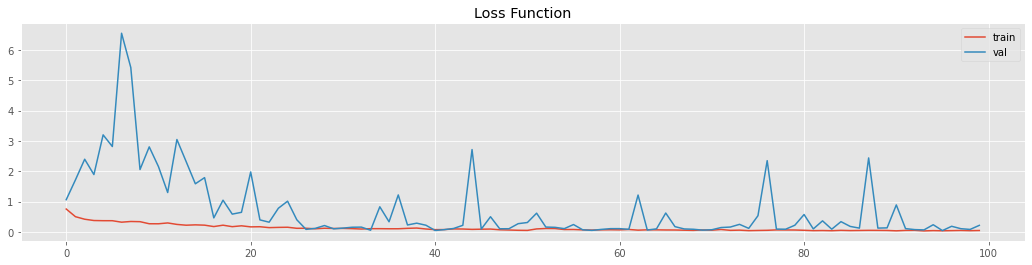

In [65]:
#plotting loss
plt.style.use('ggplot')
fig1= plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig1.savefig("Loss Function",dpi=700)

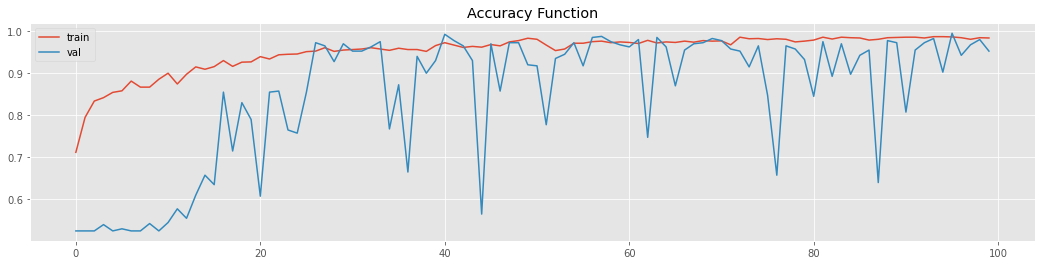

In [66]:
#plotting accuracy
fig2 = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig2.savefig("Accuracy Function",dpi=700)